In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  roc_auc_score

In [ ]:
!kaggle datasets download -d juliasuzuki/waze-dataset-to-predict-user-churn

Dataset URL: https://www.kaggle.com/datasets/juliasuzuki/waze-dataset-to-predict-user-churn
License(s): unknown
  0% 0.00/475k [00:00<?, ?B/s]
100% 475k/475k [00:00<00:00, 74.5MB/s]


In [ ]:
!unzip waze-dataset-to-predict-user-churn.zip

Archive:  waze-dataset-to-predict-user-churn.zip
  inflating: waze_dataset.csv        


In [ ]:
df = pd.read_csv('/content/waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
df.shape

(14999, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [ ]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [ ]:
df.isnull().sum()

,0
label,700
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0
activity_days,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
le = LabelEncoder()
df['device'] = le.fit_transform(df['device'])
df['label'] = le.fit_transform(df['label'])

In [ ]:
df['device'].value_counts()

,count
device,
1,9225
0,5074


In [ ]:
df['label'].value_counts()

,count
label,
1,11763
0,2536


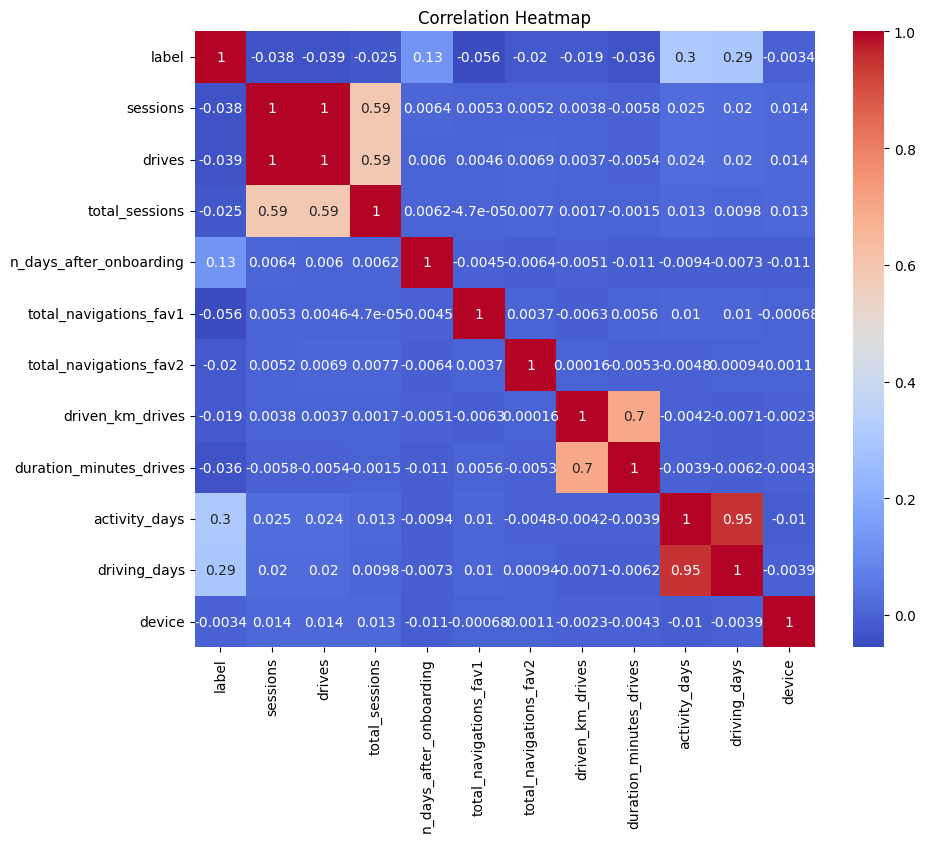

In [ ]:
confusion_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

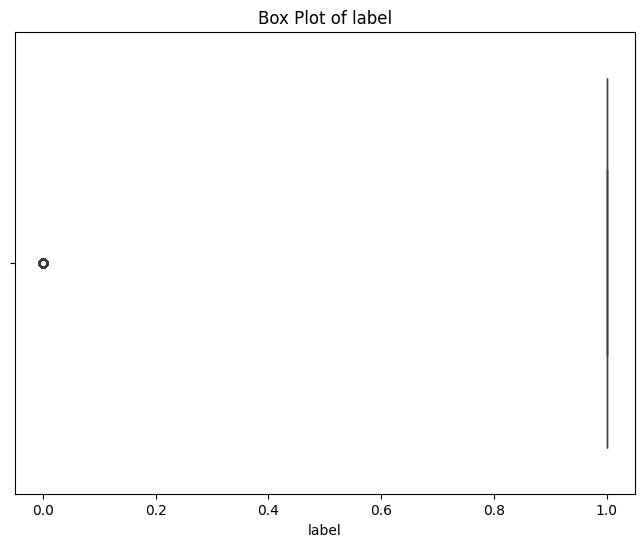

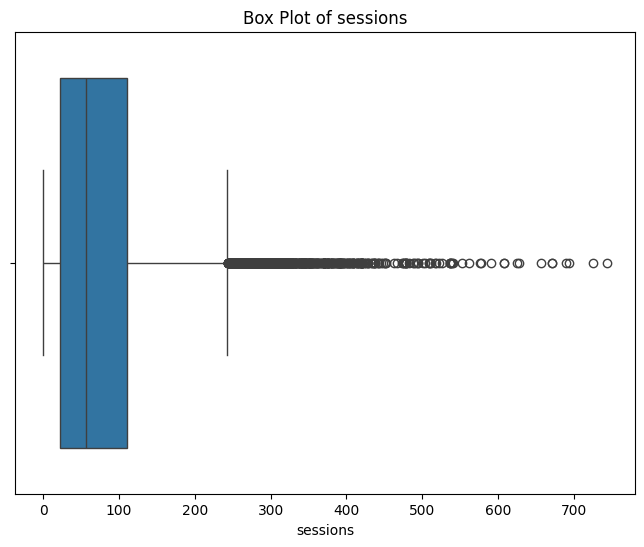

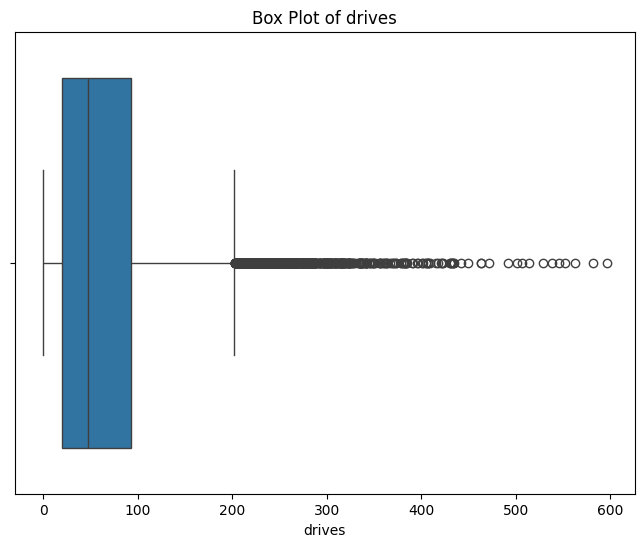

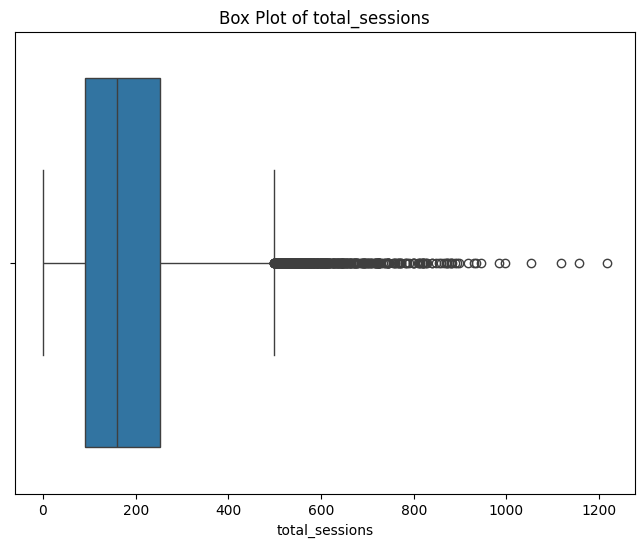

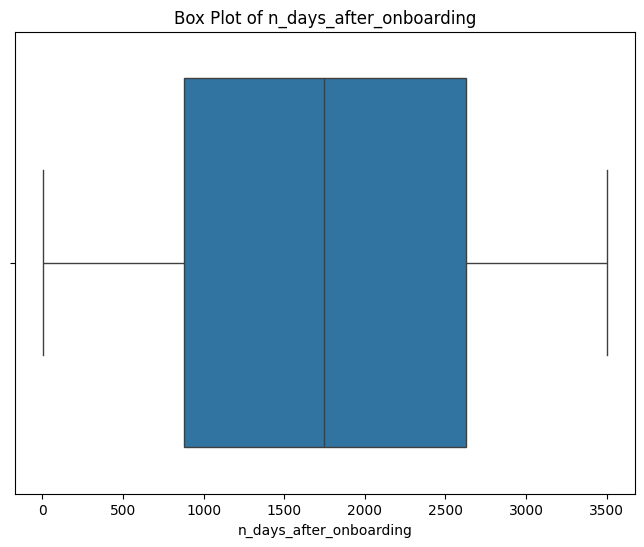

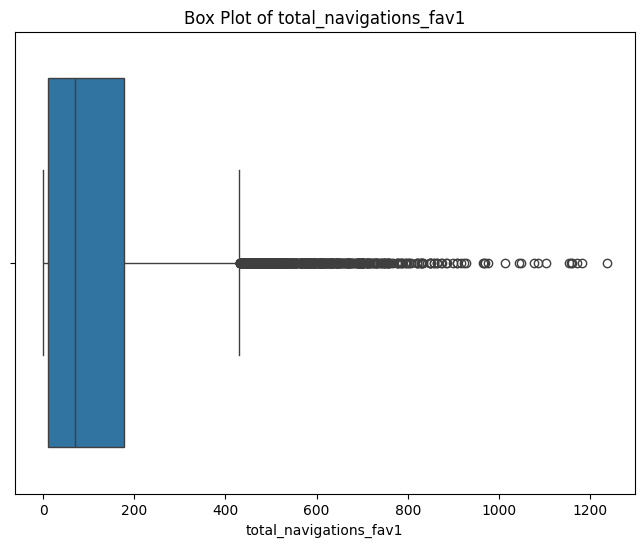

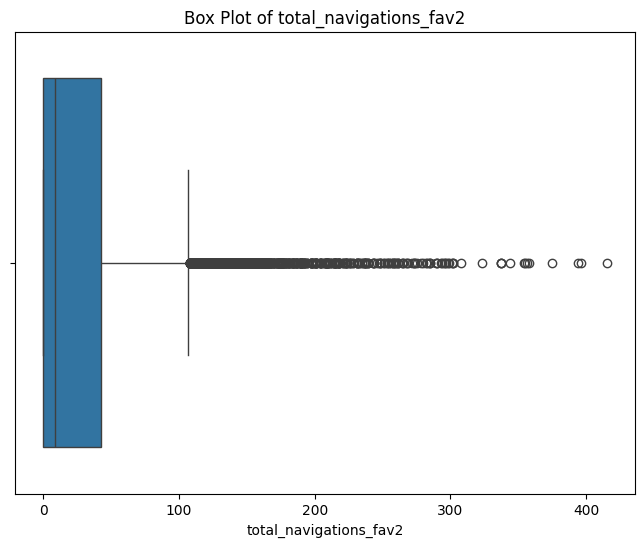

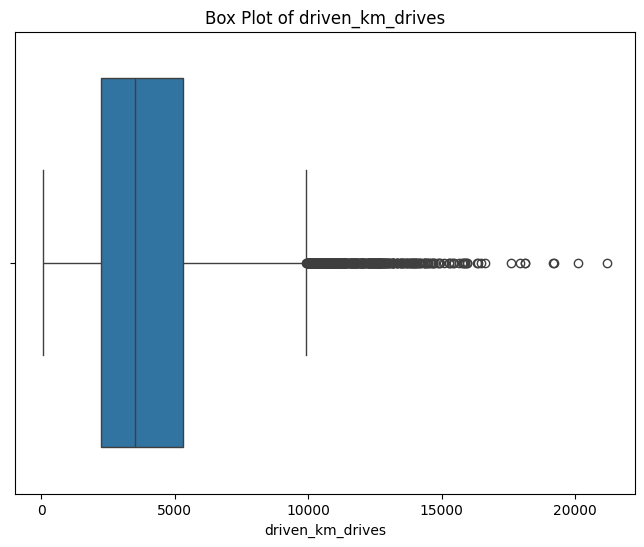

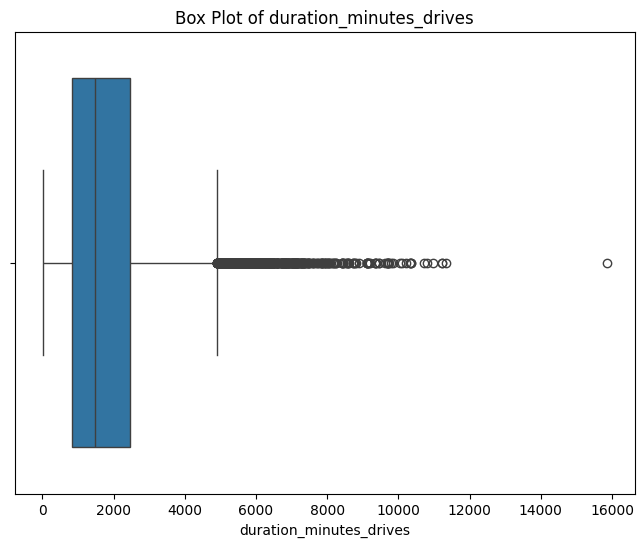

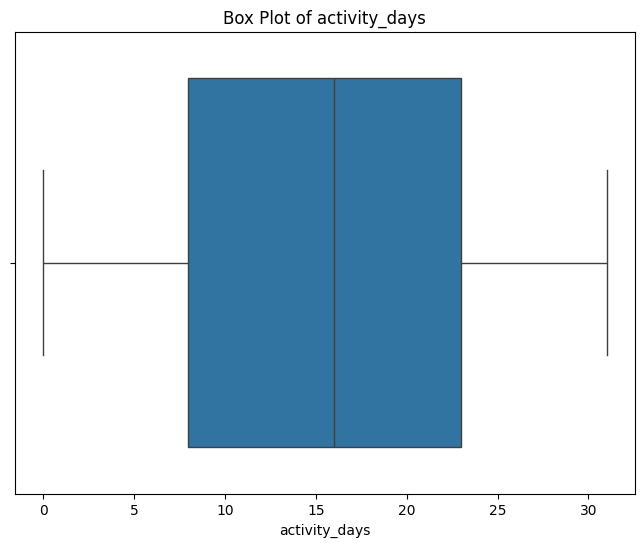

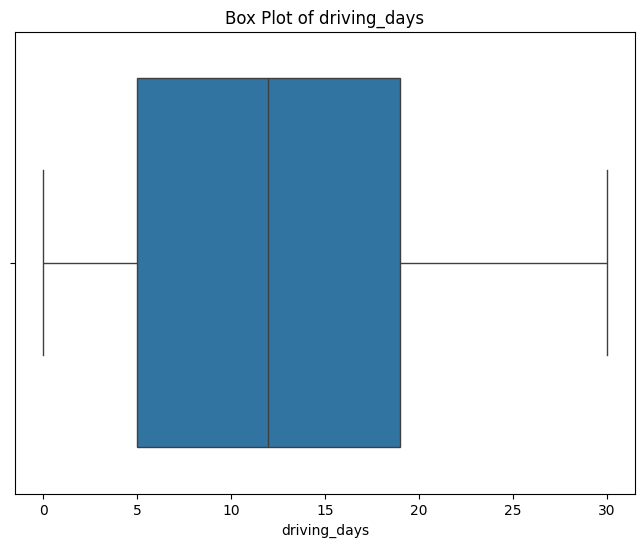

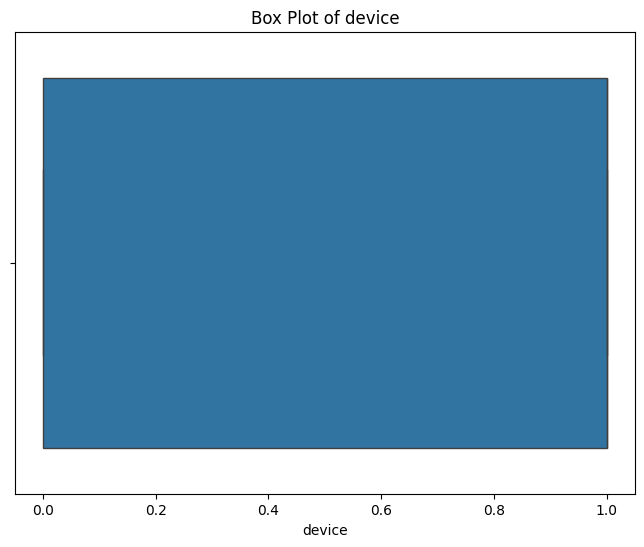

In [ ]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True ,random_state=0)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

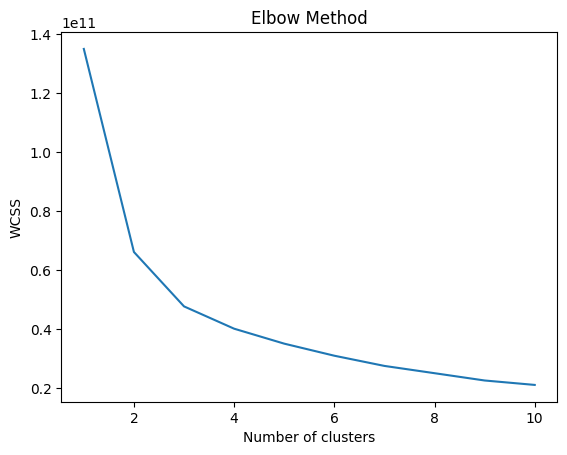

In [ ]:
wcss = []                              # calculates the sum of the squared distances between each data point and the centroid of its assigned cluster.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.6227272727272727
              precision    recall  f1-score   support

           0       0.24      0.54      0.33       506
           1       0.87      0.64      0.74      2354

    accuracy                           0.62      2860
   macro avg       0.55      0.59      0.54      2860
weighted avg       0.76      0.62      0.67      2860

ROC AUC Score: 0.588517232462783


In [ ]:
model3 = XGBRFClassifier()
model3.fit(X_train_pca, y_train)
y_pred = model3.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report (y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.3202797202797203
              precision    recall  f1-score   support

           0       0.17      0.75      0.28       506
           1       0.81      0.23      0.36      2354

    accuracy                           0.32      2860
   macro avg       0.49      0.49      0.32      2860
weighted avg       0.70      0.32      0.34      2860

ROC AUC Score: 0.4901185770750988


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, kernel='linear', )
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.823076923076923
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.82      1.00      0.90      2354

    accuracy                           0.82      2860
   macro avg       0.41      0.50      0.45      2860
weighted avg       0.68      0.82      0.74      2860



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
